
# f₀ Analysis - Polyphonic Singing

This notebook explores the pitch (fundamental frequency) of a traditional polyphonic folk recording.

I used `librosa.pyin()` to extract f₀ from the full mix, and I'll later compare individual mic tracks (solo voices).

- Recording analyzed: `BMI_UK20080163_ivano-frankivsk_zhovchiv`
- Goal: Visualize pitch over time and observe melody, harmony, and gaps



### Next Steps: individual mic recordings
- Analyze the **individual mic recordings** to get cleaner, more stable pitch contours.
- Compare f₀ ranges between singers.
- Check for moments of harmony or divergence between parts.


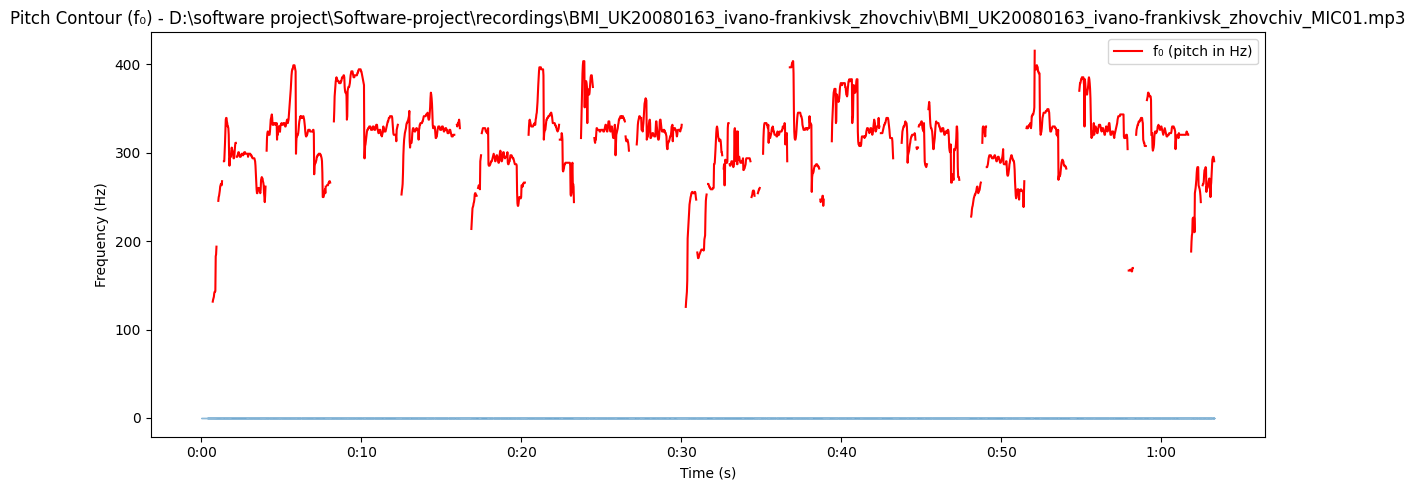

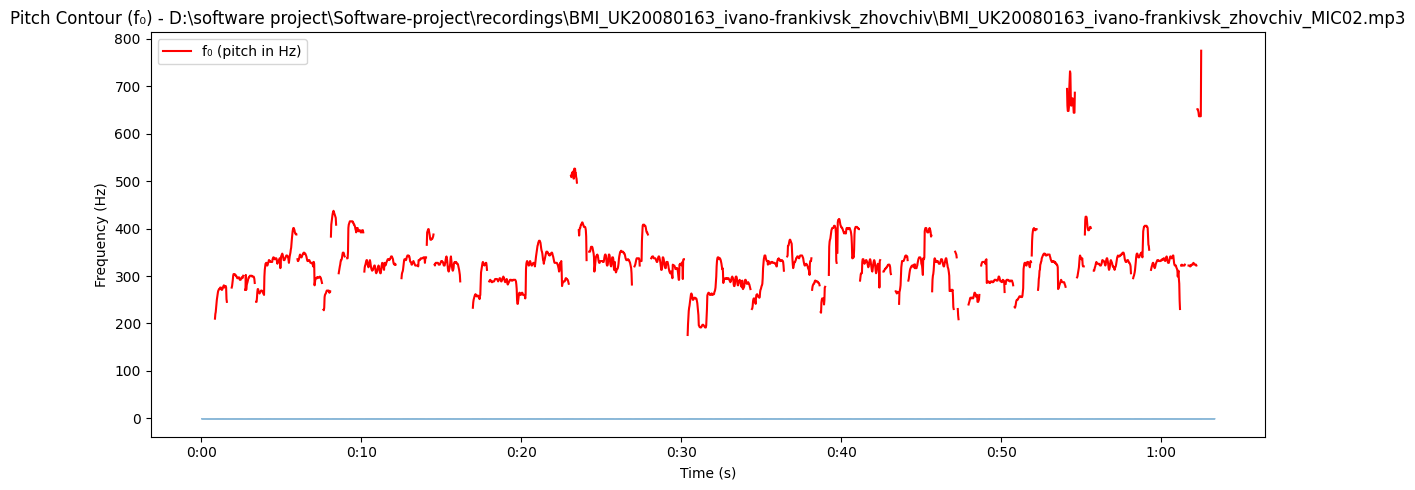

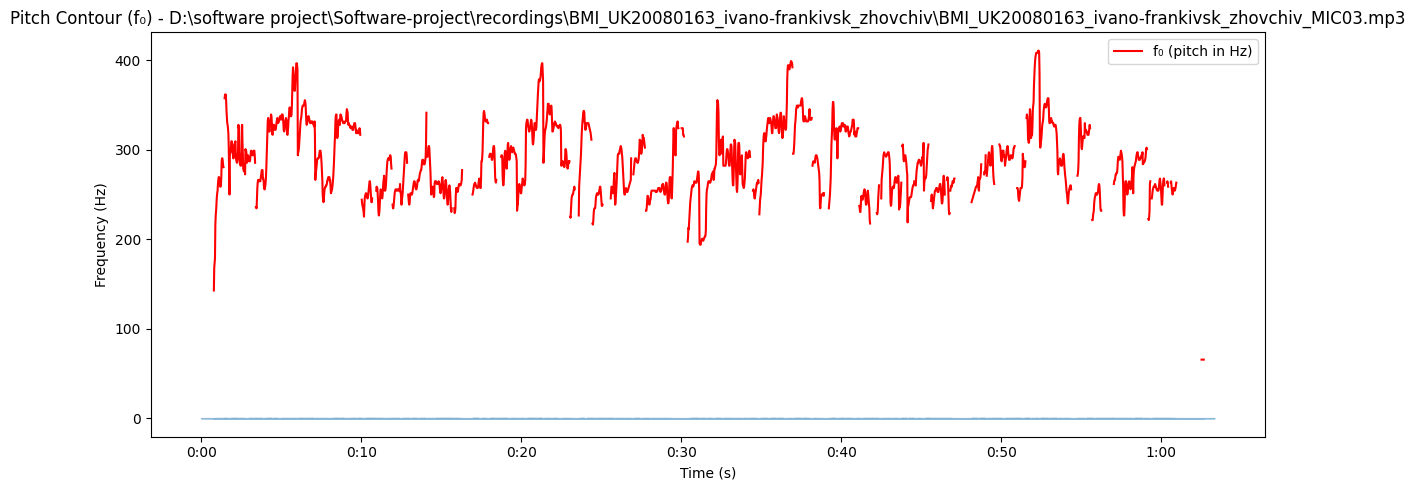

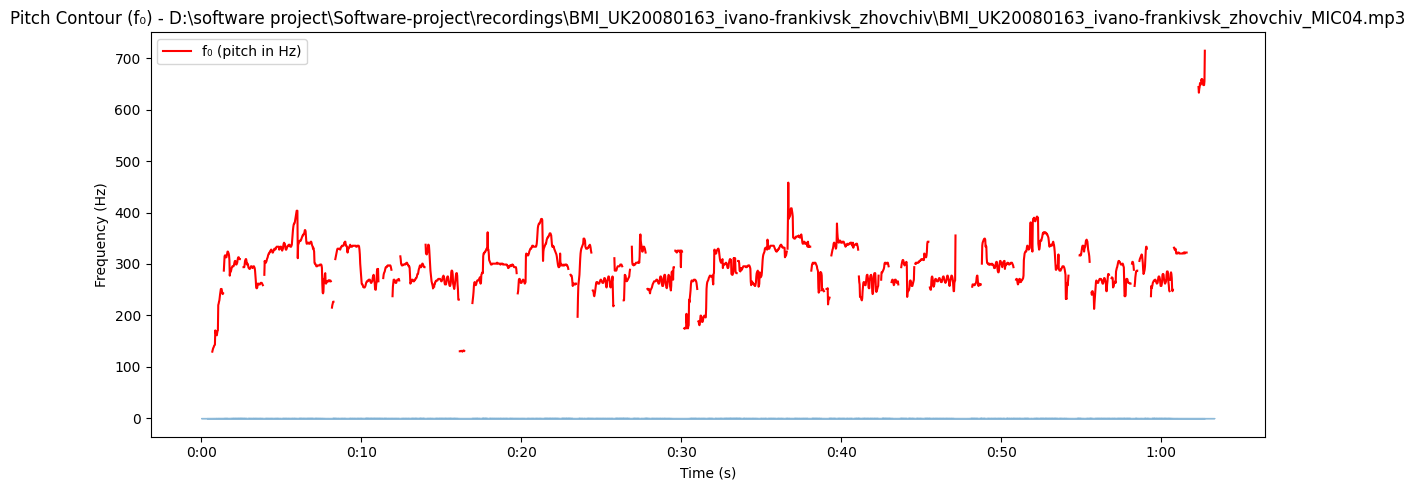

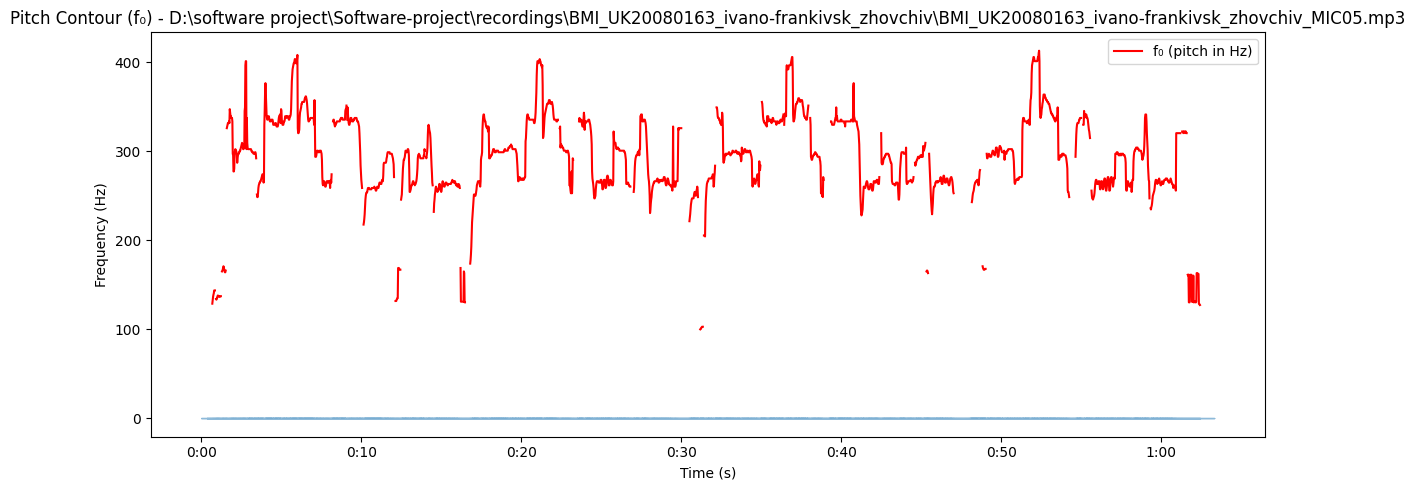

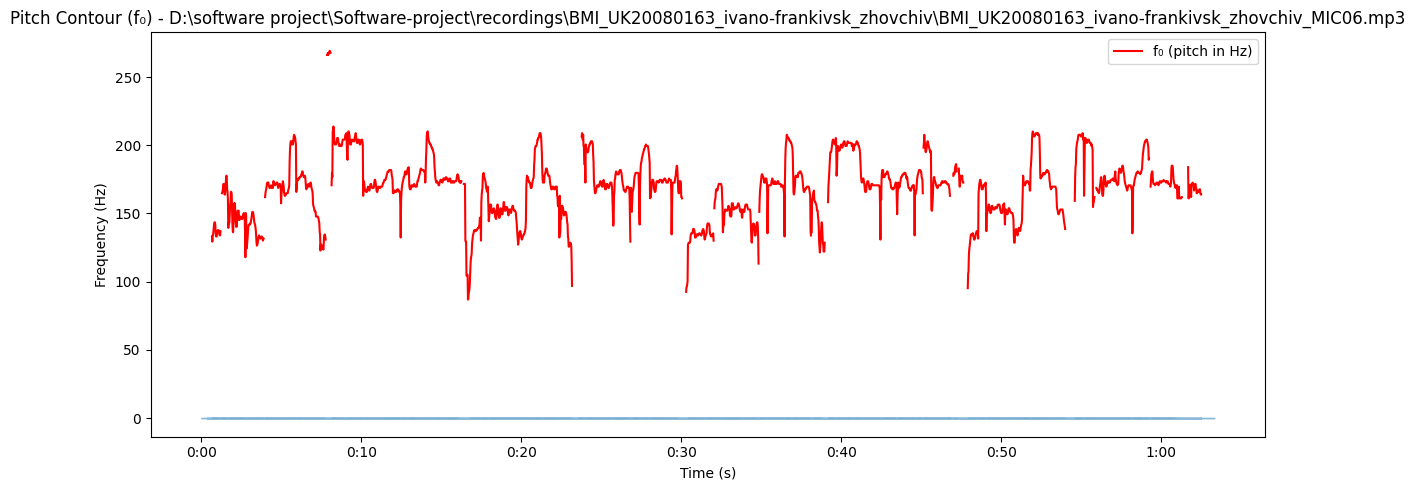

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load one mic track 

mic_1 = r"D:\software project\Software-project\recordings\BMI_UK20080163_ivano-frankivsk_zhovchiv\BMI_UK20080163_ivano-frankivsk_zhovchiv_MIC01.mp3"
mic_2 = r"D:\software project\Software-project\recordings\BMI_UK20080163_ivano-frankivsk_zhovchiv\BMI_UK20080163_ivano-frankivsk_zhovchiv_MIC02.mp3"
mic_3 = r"D:\software project\Software-project\recordings\BMI_UK20080163_ivano-frankivsk_zhovchiv\BMI_UK20080163_ivano-frankivsk_zhovchiv_MIC03.mp3"
mic_4 = r"D:\software project\Software-project\recordings\BMI_UK20080163_ivano-frankivsk_zhovchiv\BMI_UK20080163_ivano-frankivsk_zhovchiv_MIC04.mp3"
mic_5 = r"D:\software project\Software-project\recordings\BMI_UK20080163_ivano-frankivsk_zhovchiv\BMI_UK20080163_ivano-frankivsk_zhovchiv_MIC05.mp3"
mic_6 = r"D:\software project\Software-project\recordings\BMI_UK20080163_ivano-frankivsk_zhovchiv\BMI_UK20080163_ivano-frankivsk_zhovchiv_MIC06.mp3"

def show_track_pying(filename):
     # or .wav, etc.
    y, sr = librosa.load(filename)
    
    # Extract pitch (f₀) using pYIN
    f0, voiced_flag, voiced_probs = librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C6')
    )
    
    # Generate time axis
    times = librosa.times_like(f0)
    
    # Plot the waveform and f₀ contour
    plt.figure(figsize=(12, 5))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, f0, color='r', label='f₀ (pitch in Hz)')
    plt.title(f"Pitch Contour (f₀) - {filename}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    plt.tight_layout()
    plt.show()

show_track_pying(mic_1)
show_track_pying(mic_2)
show_track_pying(mic_3)
show_track_pying(mic_4)
show_track_pying(mic_5)
show_track_pying(mic_6)